<h1>Capstone Project - The Battle of the Neighborhoods (Week 2)</h1>
<h3>Applied Data Science Capstone by IBM/Coursera</h3>
<br>

## Study COVID-19 Cases in the City of Toronto Neighborhoods
<br>

## Table of contents
* Introduction: Business Problem
* Data
* Methodology
* Analysis
* Results and Discussion
* Conclusion

## Introduction

<p>As COVID-19 hits everywhere in the world, I decided to take Toronto as a case study, the study will characterize Toronto neighbourhoods by features include people testing positive for COVID-19, health units, populations, income, housing and way of transportation.</p>
<p>The purpose of this project aims to create an analysis of features for the City of Toronto as a comparative analysis between neighborhoods to show the effective of COVID-19 on each neighborhood. According to the Government of Toronto report on June 26th 2020 the number of cases are 14,134 with 1,072 deaths.</p>


## Data

<p>We will be collecting data from following sources:</p>

<ul>
<li>City of Toronto Neighbourhood Profiles to get the populations, income, education, housing and labour.</li>
    <ul><li>Source of Data: <strong>Statistics Canada, the file in CSV format</strong></li></ul>

<li>City of Toronto Neighbourhoods Boundaries for city shape to get the area name and location.</li>
<ul><li>Source of Data: <strong>Toronto Open Data, the file in GeoJSON format</strong></li></ul>

<li>City of Toronto Cases of COVID-19 to get the area location and the number of patients.</li>
<ul><li>Source of Data: <strong>Ontario Ministry of Health, integrated Public Health Information System (iPHIS), the file in CSV format</strong></li></ul>
    
<li>Foursquare API to get the Hospital information.</li>
<ul><li>Source of Data: <strong>Foursquare API</strong></li></ul>
</ul>
<br>

<strong>Import Primary Modules</strong>

In [1]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib.pyplot as plt

import json # Convert a JSON string to pandas object

import folium  # plotting library

import requests # library to handle requests
import pandas as pd # primary data structure library
import numpy as np # library to handle data in a vectorized manner
import seaborn as sns # library for making statistical graphics 

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


<strong>Open dataset of COVID 19 Cases in Toronto and read it into a pandas dataframe</strong>

In [2]:
df = pd.read_csv("CityofToronto_COVID-19_Data.csv")

#Set Neighbourhood as Index
df_covid=df.set_index(['Neighbourhood'])

print(df_covid)

                               No  Total_Cases  Rate_People          Y  \
Neighbourhood                                                            
Agincourt North               129           69   237.007522  43.805441   
Agincourt South-Malvern West  128           51   214.673570  43.788658   
Alderwood                      20           36   298.656048  43.604937   
Annex                          95           80   262.071677  43.671585   
Banbury-Don Mills              42           33   119.155082  43.737657   
...                           ...          ...          ...        ...   
Wychwood                       94           80   557.530142  43.676919   
Yonge-Eglinton                100           13   110.011001  43.704689   
Yonge-St.Clair                 79           26   207.535121  43.687859   
York University Heights        27          390  1413.401950  43.765736   
Yorkdale-Glen Park             31          163  1101.053769  43.714672   

                                     

In [3]:
# Remove unnecessary columns 
df_covid_plot=df_covid.drop(['No', 'Rate_People','Y','X'], axis=1)

<strong>Plot a Bar Chart of the dataframe</strong>

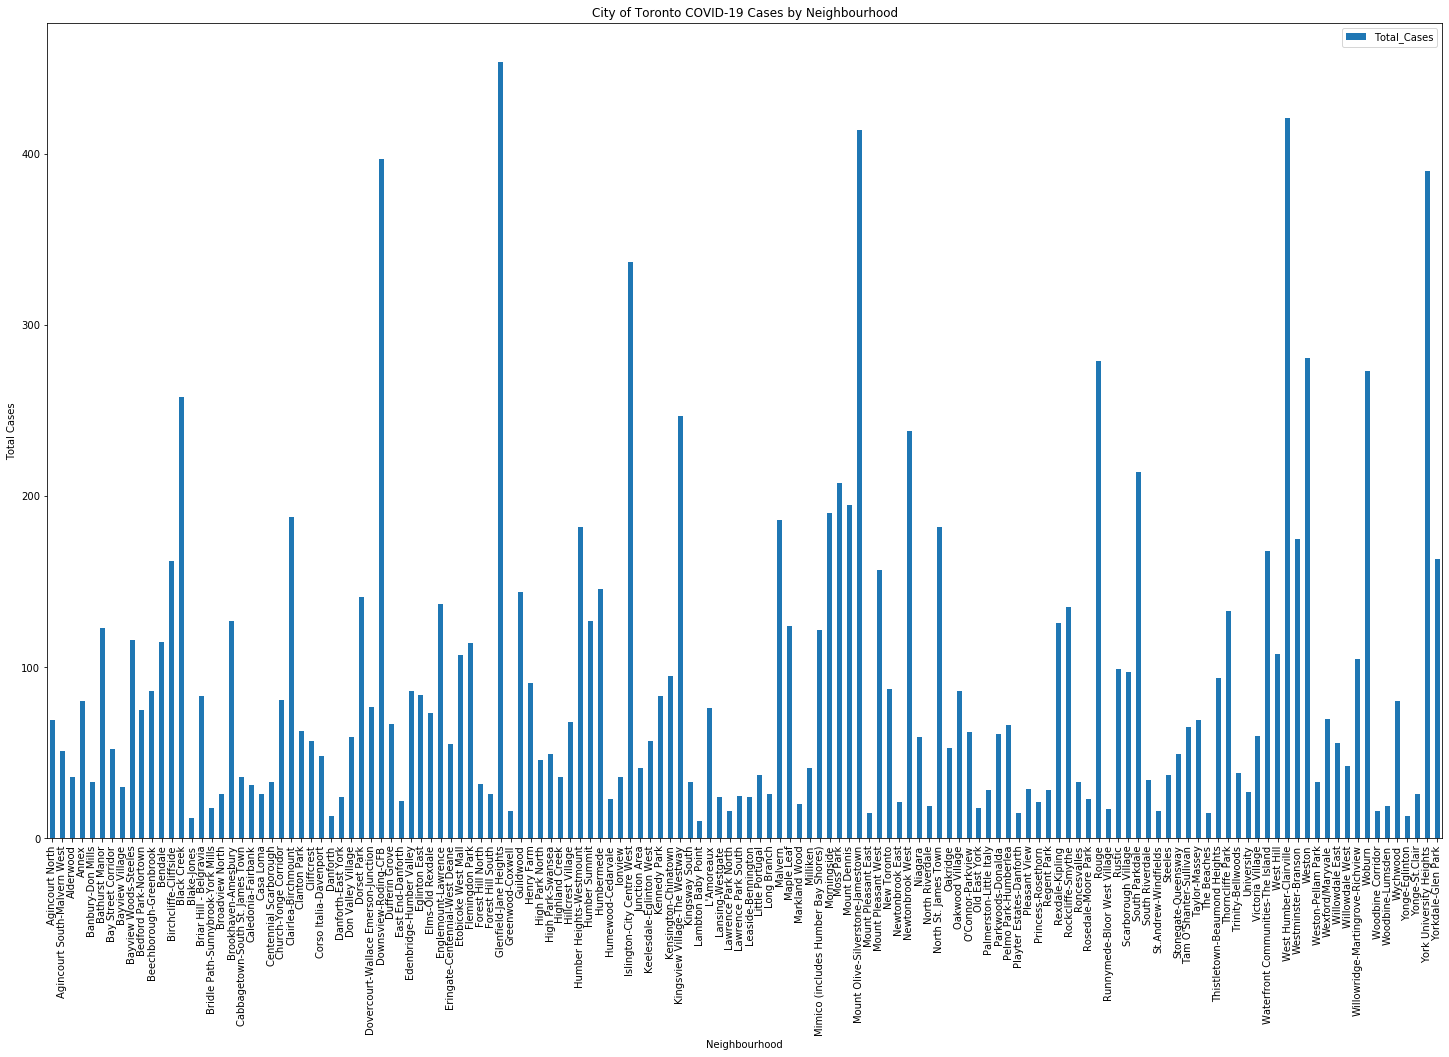

In [4]:
df_covid_plot.plot(kind='bar', figsize=(25, 15))

plt.xlabel('Neighbourhood') # add to x-label to the plot
plt.ylabel('Total Cases') # add y-label to the plot
plt.title('City of Toronto COVID-19 Cases by Neighbourhood') # add title to the plot

plt.show()

<strong>Sort the data from high to low</strong>

In [5]:
df_covid_plot.sort_values(by=['Total_Cases'], inplace=True, ascending=False)
df_covid.sort_values(by=['Total_Cases'], inplace=True, ascending=False)

<strong>Plot again a Bar Chart of the dataframe but sorted this time</strong>

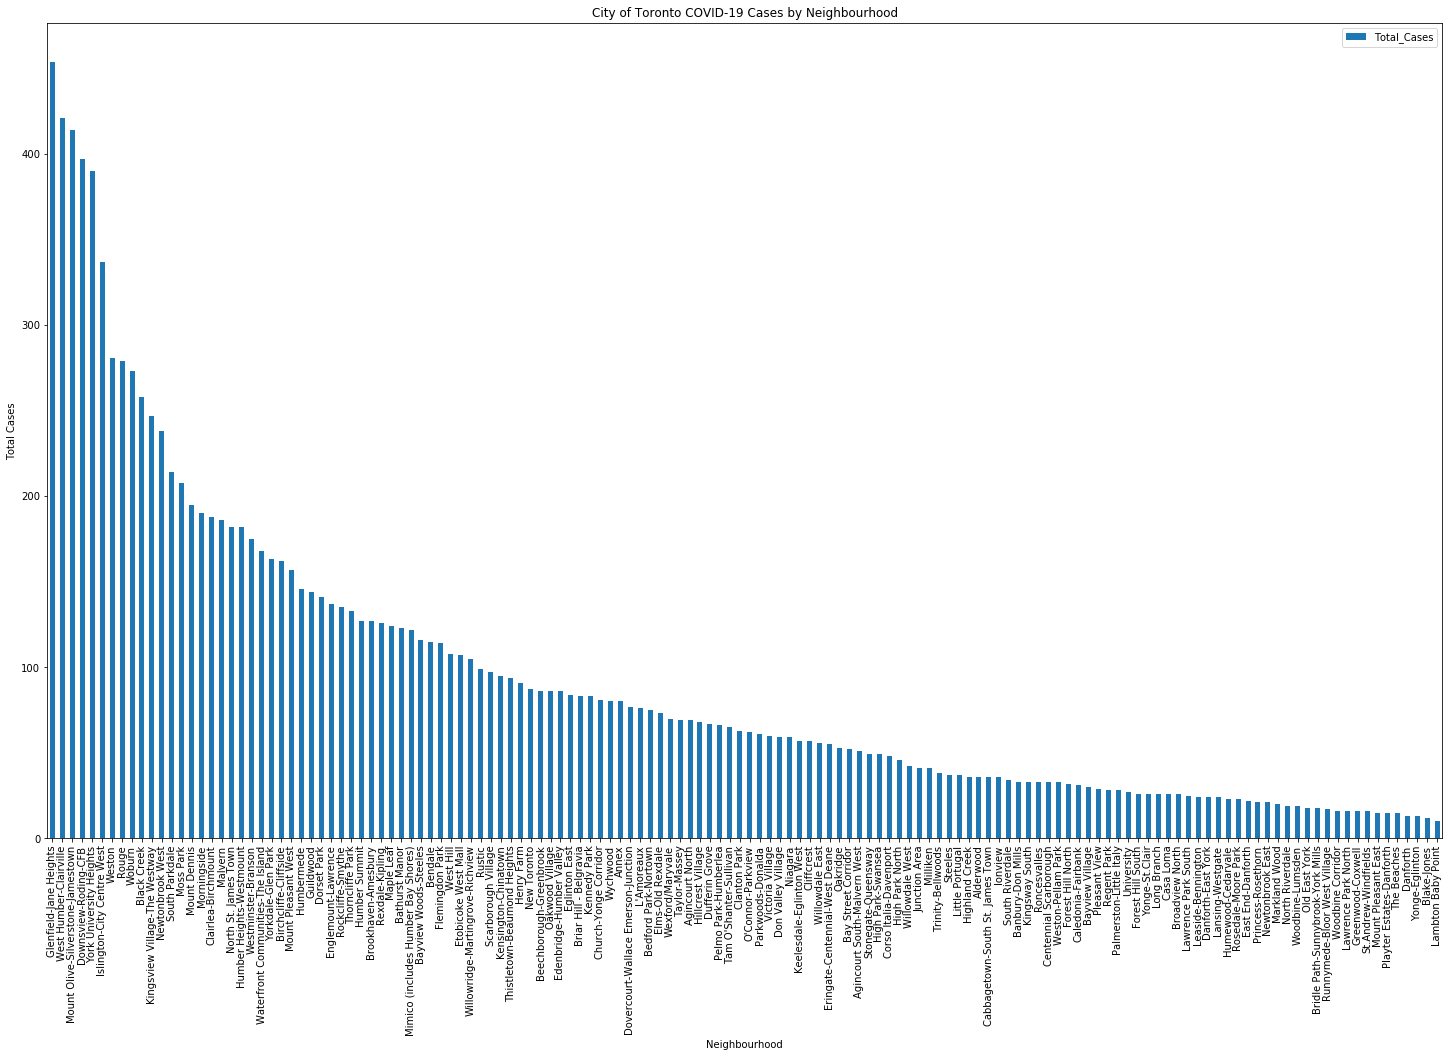

In [6]:
df_covid_plot.plot(kind='bar', figsize=(25, 15))

plt.xlabel('Neighbourhood') # add to x-label to the plot
plt.ylabel('Total Cases') # add y-label to the plot
plt.title('City of Toronto COVID-19 Cases by Neighbourhood') # add title to the plot

plt.show()

In [7]:
# Cut the first high 10 Neighbourhoods
df_covid_plot10=df_covid_plot.head(10)

<strong>Plot again just the high 10 Neighbourhoods</strong>

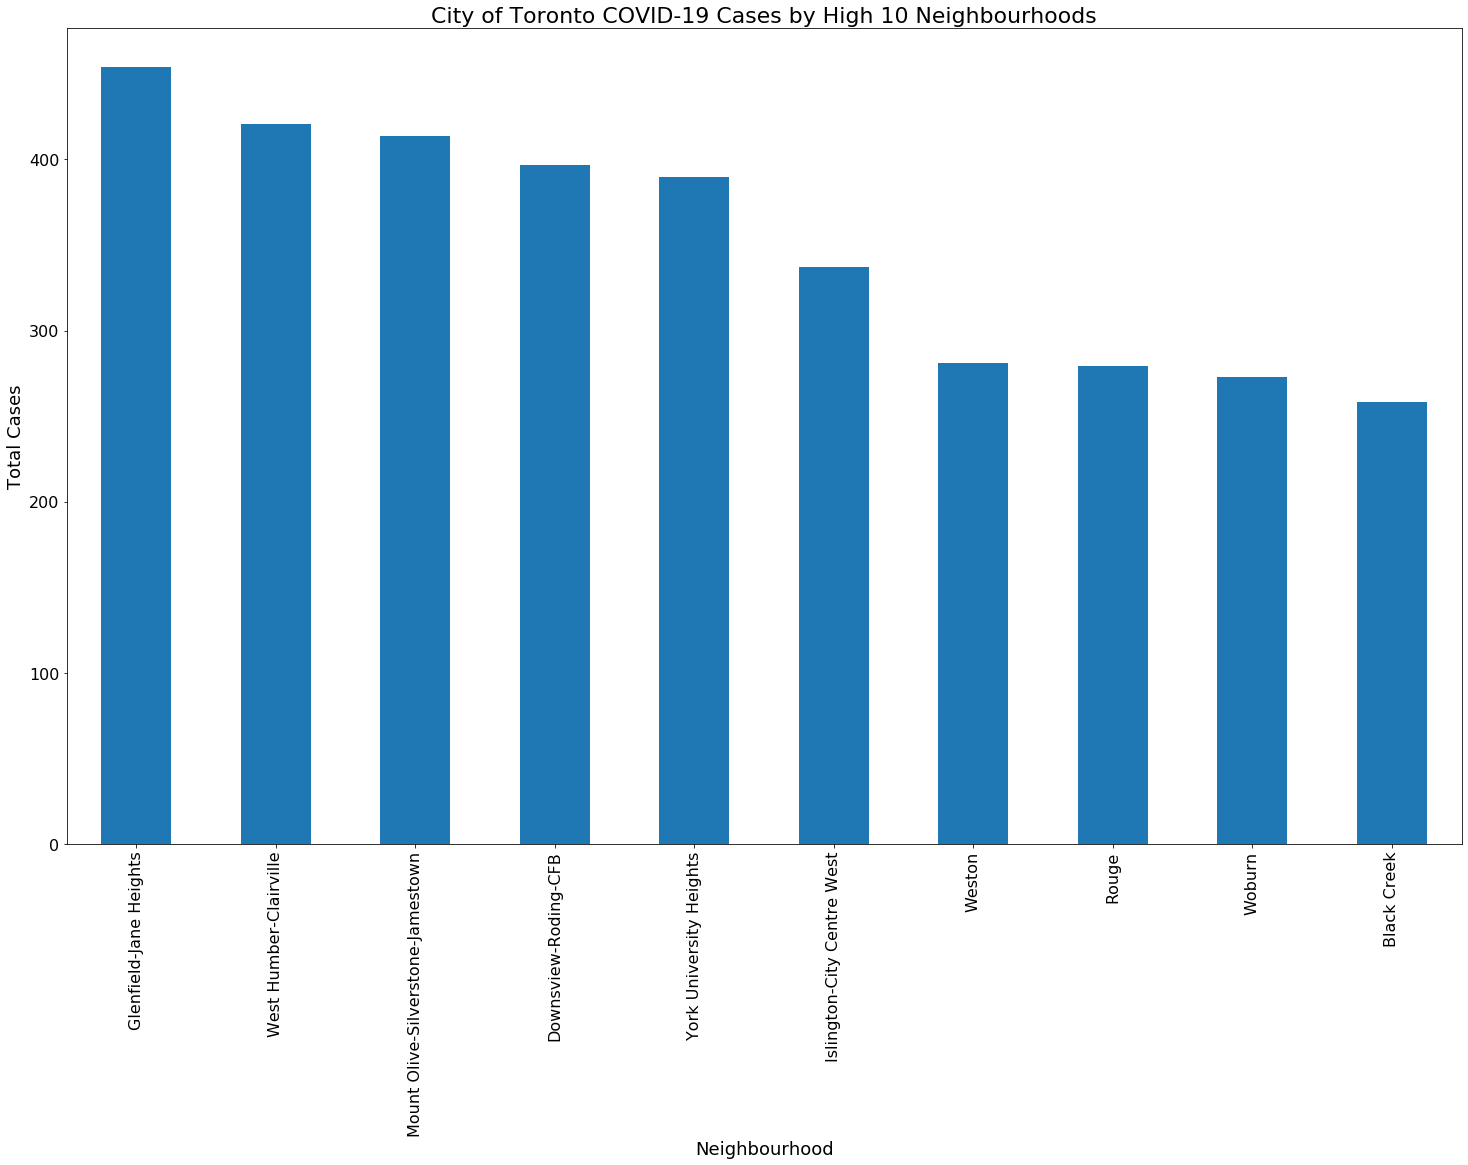

In [8]:
df_covid_plot10.plot(kind='bar', figsize=(25, 15), fontsize=16, legend=False)

plt.xlabel('Neighbourhood', fontsize=18) # add to x-label to the plot
plt.ylabel('Total Cases', fontsize=18) # add y-label to the plot
plt.title('City of Toronto COVID-19 Cases by High 10 Neighbourhoods', fontsize=22) # add title to the plot

plt.show()

<strong>Open dataset of Toronto Neighbourhood Profiles and read it into a pandas dataframe</strong>

In [9]:
df_toronto = pd.read_csv("CityofToronto_NeighbourhoodProfiles.csv")

df_toronto=df_toronto.set_index(['Neighbourhood'])

df_toronto10=df_toronto.head(10)

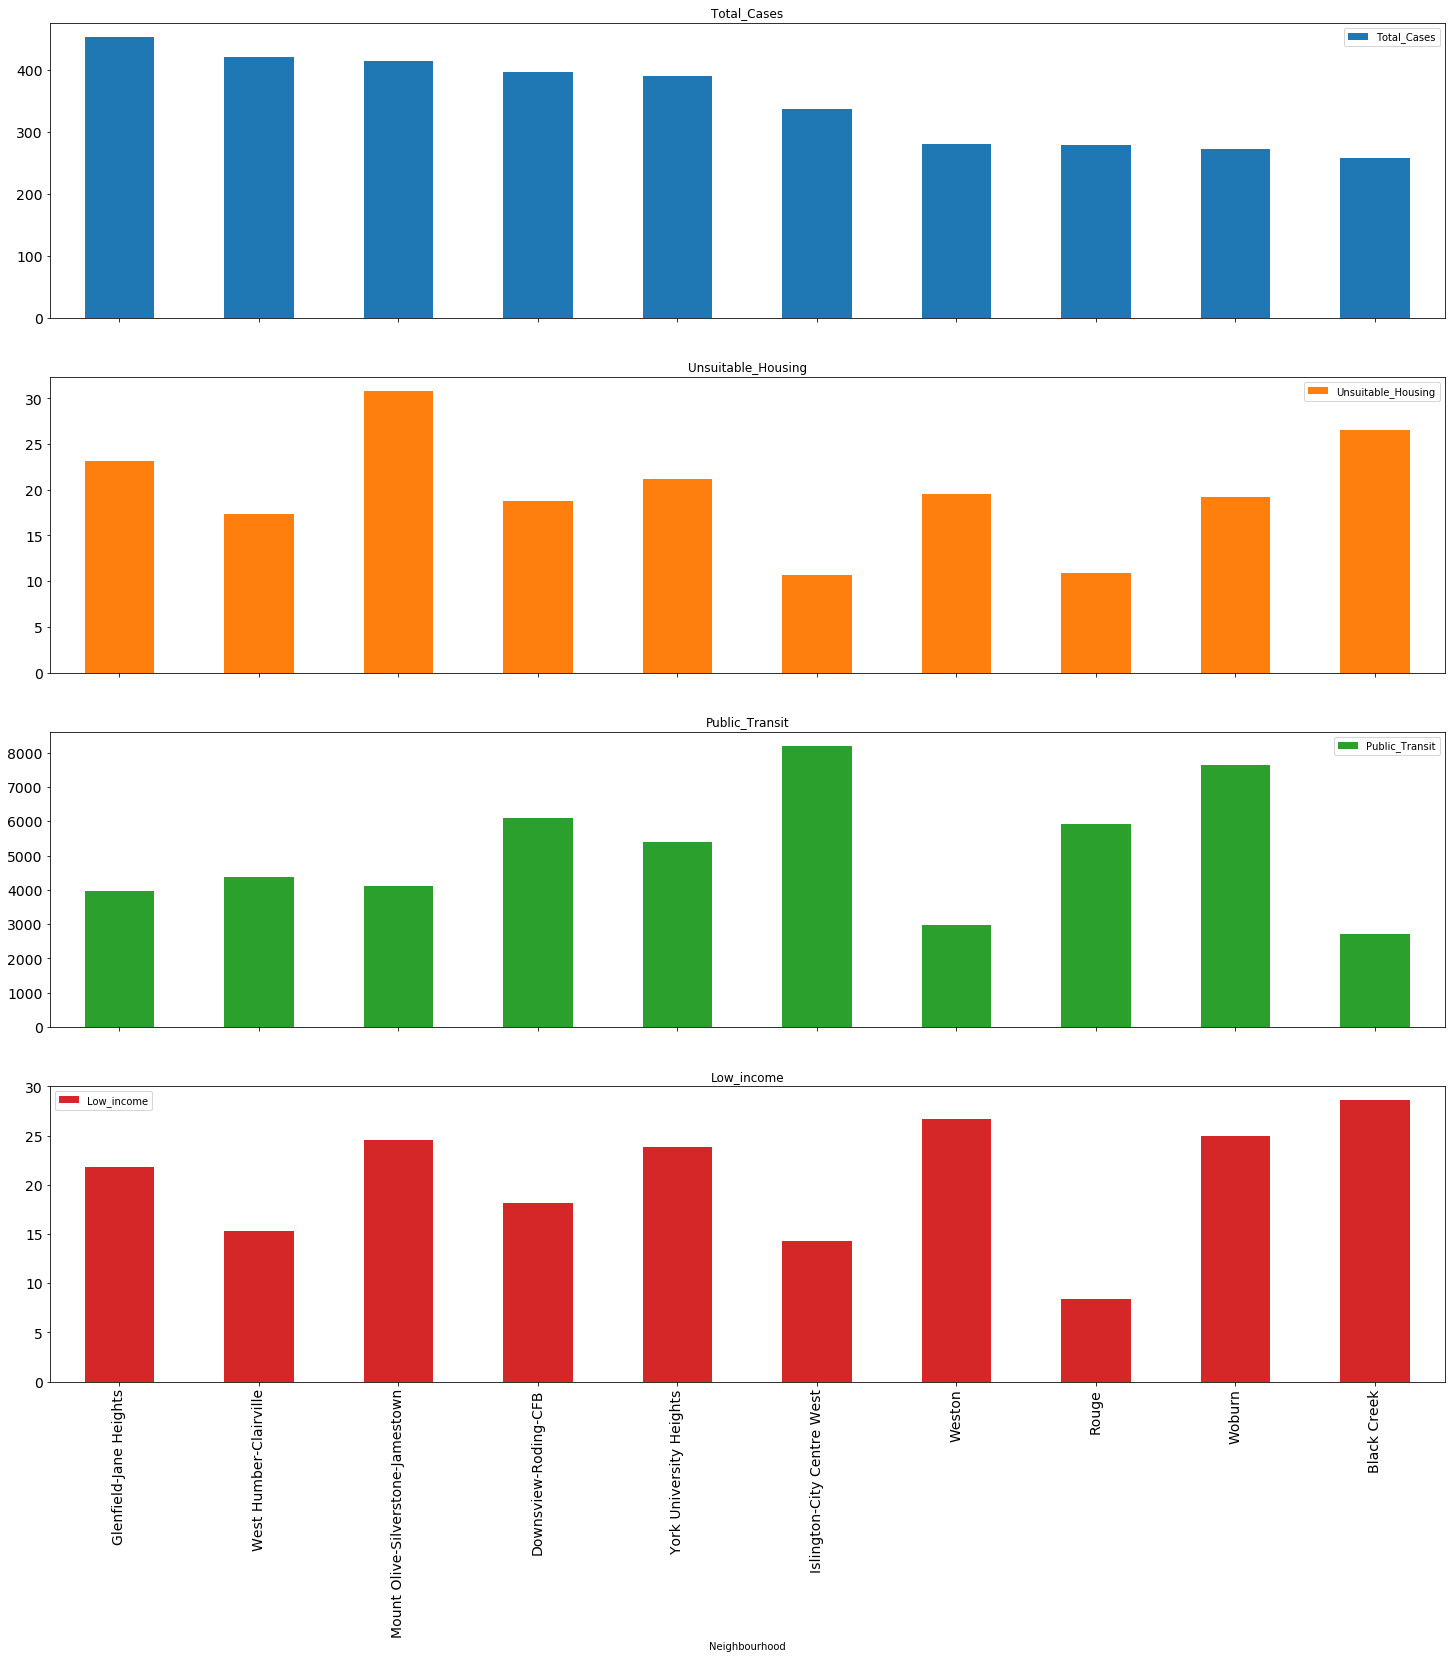

In [10]:

df_toronto10.plot.bar(figsize=(25, 25), subplots=True, fontsize=14)

plt.show()

In [11]:
df_toronto.reset_index()

,Neighbourhood,Total_Cases,Unsuitable_Housing,Public_Transit,Low_income
0,Glenfield-Jane Heights,454,23.2,3965,21.8
1,West Humber-Clairville,421,17.4,4380,15.3
2,Mount Olive-Silverstone-Jamestown,414,30.8,4110,24.6
3,Downsview-Roding-CFB,397,18.8,6085,18.1
4,York University Heights,390,21.2,5405,23.8
...,...,...,...,...,...
135,The Beaches,15,3.7,2995,10.0
136,Danforth,13,5.7,2290,12.2
137,Yonge-Eglinton,13,6.1,2935,13.2
138,Blake-Jones,12,7.4,1605,22.0


## Methodology

<p>The purpose of this project aims to compare the relationship between people infected by COVID-19 and their living and economic circumstances and create an analysis of features for the City of Toronto as a comparative analysis between neighborhoods to show the effective of COVID-19 on each neighborhood.</p>

<p>In our analysis we will use a Correlation as a technique for investigating the relationship between two quantitative, continuous variables. The correlation coefficient is a measure of the strength of the association between the two variables.</p>

<p>The first step in studying the relationship between two continuous variables is to draw a scatter plot of the variables to check for linearity.</p>

<p>The nearer the scatter of points is to a straight line, the higher the strength of association between the variables.</p>
<br>

<strong>Use correlation to summarize the strength of the linear relationship between data</strong>

In [12]:
df_toronto[['Total_Cases','Unsuitable_Housing','Public_Transit','Low_income']].corr()

,Total_Cases,Unsuitable_Housing,Public_Transit,Low_income
Total_Cases,1.000000,0.519884,0.373505,0.253532
Unsuitable_Housing,0.519884,1.000000,0.159268,0.704397
Public_Transit,0.373505,0.159268,1.000000,0.221457
Low_income,0.253532,0.704397,0.221457,1.000000


<strong>Plot the correlation between cases of COVID and percentage of unsuitable housing in each Neighbourhood</strong>

(0, 44.26005338418479)

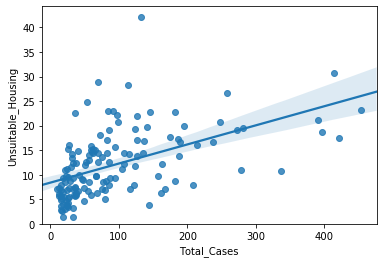

In [13]:
sns.regplot(x="Total_Cases", y="Unsuitable_Housing", data=df_toronto)
plt.ylim(0,)

<strong>Plot the correlation between cases of COVID and percentage of low income people in each Neighbourhood</strong>

(0, 42.185852185824665)

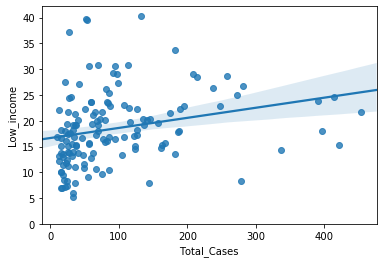

In [14]:
sns.regplot(x="Total_Cases", y="Low_income", data=df_toronto)
plt.ylim(0,)

<strong>Plot the correlation between cases of COVID and people use public transit in each Neighbourhood</strong>

(0, 11437.270493830807)

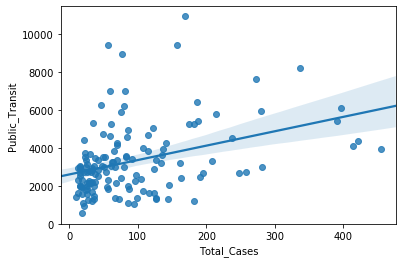

In [15]:
sns.regplot(x="Total_Cases", y="Public_Transit", data=df_toronto)
plt.ylim(0,)

<br>
<p><strong>Now we will use Foursquare API to get info on hospitals in the city of Toronto.</strong></p>

<p>We're interested in venues in 'Hospital' category, but only those that are for human and not the veterinary hospitals. So we will include in our list only venues that have 'hospital' in category name, and we'll make sure to detect and exclude all the other kind of hospitals.</p>


In [16]:
#Define Foursquare Credentials and Version

CLIENT_ID = 'VLNMJ41HE2TFND2VJEJEKRYF5YP15YO3I0I0SQVQ53CA1VAU' # Foursquare ID
CLIENT_SECRET = 'SRAG4ABDGHJPU5K1ZCFTUDEMK2BO3T1DBZNYZ1IRC0P225QJ' # Foursquare Secret
VERSION = '20180604'
LIMIT = 50

In [17]:
# Setup Toronto latitude and longitude
latitude=43.76
longitude=-79.34

print(latitude, longitude)

43.76 -79.34


In [18]:
# Search for hospitals in Toronto area
search_query = 'Hospital'
categoryId = '4bf58dd8d48988d196941735'
radius = 10000

In [19]:
# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, categoryId, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=VLNMJ41HE2TFND2VJEJEKRYF5YP15YO3I0I0SQVQ53CA1VAU&client_secret=SRAG4ABDGHJPU5K1ZCFTUDEMK2BO3T1DBZNYZ1IRC0P225QJ&ll=43.76,-79.34&v=20180604&categoryId=4bf58dd8d48988d196941735&radius=10000&limit=50'

In [20]:
# Send the GET Request
results = requests.get(url).json()

In [21]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# transform venues into a dataframe
df_hospitals = json_normalize(venues)
df_hospitals.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4adb8e3bf964a520f22821e3,Michael Garron Hospital,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1593305573,False,825 Coxwell Ave,Mortimer Ave,43.689573,-79.326173,"[{'label': 'display', 'lat': 43.689573, 'lng':...",7918,M4C 3E7,CA,East York,ON,Canada,"[825 Coxwell Ave (Mortimer Ave), East York ON ...",NaN,NaN
1,4af831c1f964a520510b22e3,Bridgepoint Health,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1593305573,False,430 Broadview Av.,Gerrard St.,43.666847,-79.354591,"[{'label': 'display', 'lat': 43.66684718221464...",10435,NaN,CA,Toronto,ON,Canada,"[430 Broadview Av. (Gerrard St.), Toronto ON, ...",NaN,NaN
2,4ad797f6f964a520880c21e3,Sunnybrook Health Sciences Centre,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1593305573,False,2075 Bayview Ave,at Blythwood Rd.,43.721505,-79.376210,"[{'label': 'display', 'lat': 43.72150545991439...",5181,M4N 3N5,CA,Toronto,ON,Canada,"[2075 Bayview Ave (at Blythwood Rd.), Toronto ...",NaN,NaN
3,4b6c7ba2f964a520bb3d2ce3,North York General Hospital,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1593305573,False,4001 Leslie St,at Sheppard Ave E,43.768974,-79.363209,"[{'label': 'display', 'lat': 43.76897368914205...",2116,M2K 1E1,CA,Toronto,ON,Canada,"[4001 Leslie St (at Sheppard Ave E), Toronto O...",NaN,NaN
4,4b1fbe8af964a5209e2824e3,Mount Sinai Hospital Women's and Infants' Depa...,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1593305573,False,"700 University Ave., 3rd floor, Ontario Power ...",at College St.,43.659612,-79.390761,"[{'label': 'display', 'lat': 43.6596121502049,...",11898,NaN,CA,Toronto,ON,Canada,"[700 University Ave., 3rd floor, Ontario Power...",NaN,NaN


In [22]:
# filter the dataframe to exclude veterinary hospitals from the dataset
df_hospitals=df_hospitals[df_hospitals['name'].str.contains("Hospital")]

In [23]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df_hospitals.columns if col.startswith('location.')] + ['id']
dataframe_hospitals_filtered = df_hospitals.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_hospitals_filtered['categories'] = dataframe_hospitals_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_hospitals_filtered.columns = [column.split('.')[-1] for column in dataframe_hospitals_filtered.columns]

dataframe_hospitals_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Michael Garron Hospital,Hospital,825 Coxwell Ave,Mortimer Ave,43.689573,-79.326173,"[{'label': 'display', 'lat': 43.689573, 'lng':...",7918,M4C 3E7,CA,East York,ON,Canada,"[825 Coxwell Ave (Mortimer Ave), East York ON ...",NaN,4adb8e3bf964a520f22821e3
3,North York General Hospital,Hospital,4001 Leslie St,at Sheppard Ave E,43.768974,-79.363209,"[{'label': 'display', 'lat': 43.76897368914205...",2116,M2K 1E1,CA,Toronto,ON,Canada,"[4001 Leslie St (at Sheppard Ave E), Toronto O...",NaN,4b6c7ba2f964a520bb3d2ce3
4,Mount Sinai Hospital Women's and Infants' Depa...,Hospital,"700 University Ave., 3rd floor, Ontario Power ...",at College St.,43.659612,-79.390761,"[{'label': 'display', 'lat': 43.6596121502049,...",11898,NaN,CA,Toronto,ON,Canada,"[700 University Ave., 3rd floor, Ontario Power...",NaN,4b1fbe8af964a5209e2824e3
5,North York General Hospital - Branson Site,Hospital,555 Finch Ave. W,at Arnott Ave.,43.772457,-79.447449,"[{'label': 'display', 'lat': 43.77245736800578...",8748,M2R 1N5,CA,North York,ON,Canada,"[555 Finch Ave. W (at Arnott Ave.), North York...",NaN,4c501a14885c1b8dc5afac38
6,Rouge Valley Centenary Hospital,Hospital,2867 Ellesmere Rd.,at Neilson Rd.,43.780614,-79.205151,"[{'label': 'display', 'lat': 43.78061431275554...",11080,M1E 4B9,CA,Toronto,ON,Canada,"[2867 Ellesmere Rd. (at Neilson Rd.), Toronto ...",NaN,4b828d15f964a520efd730e3
7,St. John Rehab Hospital,Hospital,285 Cummer Ave.,NaN,43.787136,-79.404002,"[{'label': 'display', 'lat': 43.78713574081794...",5965,M2M 2G1,CA,North York,ON,Canada,"[285 Cummer Ave., North York ON M2M 2G1, Canada]",NaN,4bda7958c79cc92807fd7ee9
8,The Scarborough Hospital - General Campus,Hospital,3050 Lawrence Ave. E.,at McCowan Rd.,43.755939,-79.247761,"[{'label': 'display', 'lat': 43.75593923924494...",7429,M1P 2V5,CA,Scarborough,ON,Canada,"[3050 Lawrence Ave. E. (at McCowan Rd.), Scarb...",NaN,4b62d1c9f964a52001542ae3
9,Holland Bloorview Kids Rehabilitation Hospital,Medical Center,150 Kilgour Rd.,at Bayview Ave.,43.718293,-79.373632,"[{'label': 'display', 'lat': 43.71829338235304...",5373,M4G 1R8,CA,North York,ON,Canada,"[150 Kilgour Rd. (at Bayview Ave.), North York...",NaN,4ae1d932f964a520ea8721e3
11,Emergency Room: Sunnybrook Hospital,Emergency Room,2075 Bayview Ave.,at Blythwood Rd.,43.720854,-79.375890,"[{'label': 'display', 'lat': 43.72085439079596...",5226,M4N 3M5,CA,North York,ON,Canada,"[2075 Bayview Ave. (at Blythwood Rd.), North Y...",NaN,4b7a436df964a520da272fe3
15,Women's College Hospital,Hospital,76 Grenville St.,at Bay St.,43.661491,-79.387602,"[{'label': 'display', 'lat': 43.66149084521543...",11615,M5S 1B2,CA,Toronto,ON,Canada,"[76 Grenville St. (at Bay St.), Toronto ON M5S...",NaN,4af0615cf964a5208cdb21e3


In [24]:
# load geojson file for Toronto City
toronto_geo = r'Toronto_Neighbourhood.geojson'
toronto_geo

'Toronto_Neighbourhood.geojson'

In [25]:
# generate map centred on the City of Toronto
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add the Hospitals as blue circle markers
for lat, lng in zip(dataframe_hospitals_filtered.lat, dataframe_hospitals_filtered.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup="Hospital",
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(toronto_map)


# add the Neighbourhoods as small yellow circle markers
for lat, lng in zip(df_covid.Y, df_covid.X):
    folium.features.CircleMarker(
        [lat, lng],
        radius=4,
        color='yellow',
        popup="Neighbourhood",
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(toronto_map)
    
# add the COVID High 10 Neighbourhoods as large yellow circle markers
df_covid10=df_covid.head(10)
for lat, lng in zip(df_covid10.Y, df_covid10.X):
    folium.features.CircleMarker(
        [lat, lng],
        radius=12,
        color='yellow',
        popup="High 10 Neighbourhood",
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(toronto_map)
    

# add Toronto Neighbourhood boundaries  
toronto_map.choropleth(
    geo_data=toronto_geo,
    fill_opacity=0, 
    line_opacity=.5
)    
    
# display map
toronto_map

If the map doesn't show, just open the url: https://nbviewer.jupyter.org/ and copy and paste the github address and then go! The resulting url shows the project and the map.

## Results and Discussion

<p>Our analysis shows that the neighbourhoods that must affected by COVID-19 the people there live in an unsuitable housing and a high percentage of them use the public transit for their movement. Although the analysis shows that there is a relationship between the infected people and the income but I believe it doesn't count as the result of the correlation doesn't shows a strong relation between the number of infected against their income.

One of my aims was also visualize all Toronto neighbourhoods and focus on the high 10 neighborhood that affected by the virus and show the hospitals in the city with python folium map.
-	The Blue circles represent the Hospitals in the city.
-	The small Yellow circles represent Toronto neighbourhoods.
-	The large Yellow circles represent the most 10 neighbourhoods hardest-hit by the virus.
</p>

## Conclusion

<p>As a result, Toronto’s northeast and northwest are the city’s hardest-hit area for COVID-19, according to the result visualized map. Knowing which areas of the city are hardest-hit is valuable from a public health point of view as Ontarians testing positive for COVID-19 are more likely to live in neighbourhoods characterized by precarious housing and lower income status.
The results could point to other factors: crowded living and working conditions that many people with low income experience, living in denser housing may provide fewer opportunities to properly follow distancing recommendations.</p>


<br><br><strong>Thank You...</strong>